<h1>Evaluation</h1>
<h2>Notes</h2>

Evaluate Queries based on Class/Distances

Different metrics
1) Truth Table -> How many of class c are returned given query size s. Incooperate distance measure as confidence metric. 
2) Mean Average Precision
3) Last Rank -> Last True Positive
4) ROC-Curve ANN system vs custom system (compare different distance metrics) - AUROC - invariant to query size
5) Confusion Matrix of Class Search -> weighed by inverse distance

Ideas: Measure inter-class distance according to our metric



In [48]:
import pandas as pd
from matplotlib import figure
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from tqdm import tqdm

In [45]:
distances = np.load("custom_distances.npz")
for key in distances.keys():
    print(key)

print(distances["dist"].shape)

distances_ann = np.load("ann_distances.npz")
for key in distances_ann.keys():
    print(key)

print(distances_ann["dist"].shape)


dist
(2419, 2419)
idx
dist
(2419, 2419)


In [19]:
df = pd.read_csv("normCorrMetadata.csv")
print(df.shape)

(2419, 20)


In [52]:

# Step 1: Get the unique classes
unique_classes = df['Class'].unique()

# Step 2: Create a DataFrame to store the average distances between each class pair

def get_average_classwise_distances(distances,limit):
    average_distances = pd.DataFrame(index=unique_classes, columns=unique_classes)

    i=0
    # Step 3: Calculate the average distance for each class pair

    for class1 in tqdm(unique_classes, desc=f"Processing Class Pairs"):
        print(class1)
        for class2 in unique_classes:
            
            # Get the indices of objects in each class
            indices_class1 = np.array(df[df['Class'] == class1].index)
            indices_class2 = np.array(df[df['Class'] == class2].index)
            
            # Extract distances between objects in class1 and class2
            ixgrid = np.ix_(indices_class1, indices_class2)
            mean_distance = np.mean(distances["dist"][ixgrid])
            # Store the mean distance in the matrix
            average_distances.loc[class1, class2] = mean_distance
            i+=1
            if(limit!=None and i>limit):
                return average_distances.astype(float)

    # Step 4: Convert the DataFrame to float (in case of NaNs) for plotting
    average_distances = average_distances.astype(float)
    return average_distances

average_distances_custom = get_average_classwise_distances(distances,limit=None)
average_distances_custom.to_csv("average_distances_custom.csv")


average_distances_ann = get_average_classwise_distances(distances_ann,limit=None)
average_distances_ann.to_csv("average_distances_ann.csv")

print(average_distances_custom.head)
print(average_distances_ann.head)

Processing Class Pairs:   0%|          | 0/69 [00:00<?, ?it/s]

AircraftBuoyant


Processing Class Pairs:   1%|▏         | 1/69 [00:22<25:20, 22.36s/it]

Apartment


Processing Class Pairs:   3%|▎         | 2/69 [00:44<25:07, 22.50s/it]

AquaticAnimal


Processing Class Pairs:   4%|▍         | 3/69 [01:08<25:19, 23.03s/it]

Bed


Processing Class Pairs:   6%|▌         | 4/69 [01:29<24:12, 22.35s/it]

Bicycle


Processing Class Pairs:   7%|▋         | 5/69 [01:51<23:22, 21.91s/it]

Biplane


Processing Class Pairs:   9%|▊         | 6/69 [02:12<22:46, 21.69s/it]

Bird


Processing Class Pairs:  10%|█         | 7/69 [02:33<22:22, 21.66s/it]

Bookset


Processing Class Pairs:  12%|█▏        | 8/69 [02:55<22:04, 21.72s/it]

Bottle


Processing Class Pairs:  13%|█▎        | 9/69 [03:17<21:47, 21.80s/it]

BuildingNonResidential


Processing Class Pairs:  14%|█▍        | 10/69 [03:39<21:26, 21.80s/it]

Bus


Processing Class Pairs:  16%|█▌        | 11/69 [04:01<21:04, 21.81s/it]

Car


Processing Class Pairs:  17%|█▋        | 12/69 [04:24<21:02, 22.16s/it]

Cellphone


Processing Class Pairs:  19%|█▉        | 13/69 [04:47<21:04, 22.58s/it]

Chess


Processing Class Pairs:  20%|██        | 14/69 [05:10<20:42, 22.59s/it]

City


Processing Class Pairs:  22%|██▏       | 15/69 [05:33<20:22, 22.64s/it]

ClassicPiano


Processing Class Pairs:  23%|██▎       | 16/69 [05:55<19:51, 22.49s/it]

Computer


Processing Class Pairs:  25%|██▍       | 17/69 [06:17<19:29, 22.48s/it]

ComputerKeyboard


Processing Class Pairs:  26%|██▌       | 18/69 [06:39<19:01, 22.38s/it]

Cup


Processing Class Pairs:  28%|██▊       | 19/69 [07:03<18:49, 22.59s/it]

DeskLamp


Processing Class Pairs:  29%|██▉       | 20/69 [07:25<18:31, 22.68s/it]

DeskPhone


Processing Class Pairs:  30%|███       | 21/69 [07:48<18:11, 22.74s/it]

Door


Processing Class Pairs:  32%|███▏      | 22/69 [08:12<17:56, 22.91s/it]

Drum


Processing Class Pairs:  33%|███▎      | 23/69 [08:35<17:45, 23.17s/it]

Fish


Processing Class Pairs:  35%|███▍      | 24/69 [08:59<17:28, 23.30s/it]

FloorLamp


Processing Class Pairs:  36%|███▌      | 25/69 [09:23<17:13, 23.48s/it]

Glasses


Processing Class Pairs:  38%|███▊      | 26/69 [09:47<16:56, 23.64s/it]

Guitar


Processing Class Pairs:  39%|███▉      | 27/69 [10:10<16:30, 23.59s/it]

Gun


Processing Class Pairs:  41%|████      | 28/69 [10:56<20:43, 30.32s/it]

Hand


Processing Class Pairs:  42%|████▏     | 29/69 [11:29<20:35, 30.88s/it]

Hat


Processing Class Pairs:  43%|████▎     | 30/69 [11:55<19:06, 29.39s/it]

Helicopter


Processing Class Pairs:  45%|████▍     | 31/69 [12:20<17:54, 28.27s/it]

House


Processing Class Pairs:  46%|████▋     | 32/69 [12:46<16:59, 27.55s/it]

HumanHead


Processing Class Pairs:  48%|████▊     | 33/69 [13:12<16:11, 26.97s/it]

Humanoid


Processing Class Pairs:  49%|████▉     | 34/69 [13:37<15:28, 26.53s/it]

Insect


Processing Class Pairs:  51%|█████     | 35/69 [14:03<14:54, 26.30s/it]

Jet


Processing Class Pairs:  52%|█████▏    | 36/69 [14:28<14:20, 26.07s/it]

Knife


Processing Class Pairs:  54%|█████▎    | 37/69 [14:55<13:58, 26.21s/it]

MilitaryVehicle


Processing Class Pairs:  55%|█████▌    | 38/69 [15:22<13:37, 26.38s/it]

Monitor


Processing Class Pairs:  57%|█████▋    | 39/69 [15:47<13:01, 26.06s/it]

Monoplane


Processing Class Pairs:  58%|█████▊    | 40/69 [16:12<12:29, 25.84s/it]

Motorcycle


Processing Class Pairs:  59%|█████▉    | 41/69 [16:50<13:41, 29.36s/it]

Mug


Processing Class Pairs:  61%|██████    | 42/69 [17:17<12:55, 28.73s/it]

MultiSeat


Processing Class Pairs:  62%|██████▏   | 43/69 [17:42<11:58, 27.65s/it]

Musical_Instrument


Processing Class Pairs:  64%|██████▍   | 44/69 [18:07<11:07, 26.72s/it]

NonWheelChair


Processing Class Pairs:  65%|██████▌   | 45/69 [18:32<10:29, 26.25s/it]

PianoBoard


Processing Class Pairs:  67%|██████▋   | 46/69 [18:59<10:10, 26.53s/it]

PlantIndoors


Processing Class Pairs:  68%|██████▊   | 47/69 [19:25<09:38, 26.31s/it]

PlantWildNonTree


Processing Class Pairs:  70%|██████▉   | 48/69 [19:51<09:08, 26.10s/it]

Quadruped


Processing Class Pairs:  71%|███████   | 49/69 [20:19<08:55, 26.78s/it]

RectangleTable


Processing Class Pairs:  72%|███████▏  | 50/69 [20:43<08:10, 25.81s/it]

Rocket


Processing Class Pairs:  74%|███████▍  | 51/69 [21:06<07:33, 25.18s/it]

RoundTable


Processing Class Pairs:  75%|███████▌  | 52/69 [21:31<07:07, 25.14s/it]

Shelf


Processing Class Pairs:  77%|███████▋  | 53/69 [21:54<06:30, 24.40s/it]

Ship


Processing Class Pairs:  78%|███████▊  | 54/69 [22:18<06:03, 24.22s/it]

Sign


Processing Class Pairs:  80%|███████▉  | 55/69 [22:42<05:39, 24.22s/it]

Skyscraper


Processing Class Pairs:  81%|████████  | 56/69 [23:04<05:07, 23.68s/it]

Spoon


Processing Class Pairs:  83%|████████▎ | 57/69 [23:28<04:43, 23.65s/it]

Starship


Processing Class Pairs:  84%|████████▍ | 58/69 [23:52<04:22, 23.83s/it]

SubmachineGun


Processing Class Pairs:  86%|████████▌ | 59/69 [24:16<03:57, 23.71s/it]

Sword


Processing Class Pairs:  87%|████████▋ | 60/69 [24:38<03:30, 23.38s/it]

Tool


Processing Class Pairs:  88%|████████▊ | 61/69 [25:03<03:09, 23.70s/it]

Train


Processing Class Pairs:  90%|████████▉ | 62/69 [25:30<02:52, 24.63s/it]

Tree


Processing Class Pairs:  91%|█████████▏| 63/69 [25:52<02:23, 23.92s/it]

Truck


Processing Class Pairs:  93%|█████████▎| 64/69 [26:20<02:06, 25.29s/it]

TruckNonContainer


Processing Class Pairs:  94%|█████████▍| 65/69 [26:48<01:43, 25.86s/it]

Vase


Processing Class Pairs:  96%|█████████▌| 66/69 [27:16<01:19, 26.61s/it]

Violin


Processing Class Pairs:  97%|█████████▋| 67/69 [27:43<00:53, 26.90s/it]

Wheel


Processing Class Pairs:  99%|█████████▊| 68/69 [28:09<00:26, 26.37s/it]

WheelChair


Processing Class Pairs:   0%|          | 0/69 [00:00<?, ?it/s]

AircraftBuoyant


Processing Class Pairs:   1%|▏         | 1/69 [00:14<16:28, 14.53s/it]

Apartment


Processing Class Pairs:   3%|▎         | 2/69 [00:28<15:33, 13.93s/it]

AquaticAnimal


Processing Class Pairs:   4%|▍         | 3/69 [00:40<14:41, 13.36s/it]

Bed


Processing Class Pairs:   6%|▌         | 4/69 [00:54<14:44, 13.61s/it]

Bicycle


Processing Class Pairs:   7%|▋         | 5/69 [01:07<14:12, 13.33s/it]

Biplane


Processing Class Pairs:   9%|▊         | 6/69 [01:20<13:44, 13.09s/it]

Bird


Processing Class Pairs:  10%|█         | 7/69 [01:34<14:01, 13.58s/it]

Bookset


Processing Class Pairs:  12%|█▏        | 8/69 [01:47<13:29, 13.26s/it]

Bottle


Processing Class Pairs:  13%|█▎        | 9/69 [02:01<13:29, 13.49s/it]

BuildingNonResidential


Processing Class Pairs:  14%|█▍        | 10/69 [02:14<13:12, 13.42s/it]

Bus


Processing Class Pairs:  16%|█▌        | 11/69 [02:27<12:52, 13.32s/it]

Car


Processing Class Pairs:  17%|█▋        | 12/69 [44:08<12:11:25, 769.91s/it]

Cellphone


Processing Class Pairs:  19%|█▉        | 13/69 [44:23<8:25:07, 541.20s/it] 

Chess


Processing Class Pairs:  20%|██        | 14/69 [44:34<5:49:24, 381.16s/it]

City


Processing Class Pairs:  22%|██▏       | 15/69 [44:45<4:02:43, 269.69s/it]

ClassicPiano


Processing Class Pairs:  23%|██▎       | 16/69 [44:56<2:49:30, 191.90s/it]

Computer


Processing Class Pairs:  25%|██▍       | 17/69 [45:08<1:59:18, 137.66s/it]

ComputerKeyboard


Processing Class Pairs:  26%|██▌       | 18/69 [45:19<1:24:43, 99.68s/it] 

Cup


Processing Class Pairs:  28%|██▊       | 19/69 [45:30<1:00:49, 72.98s/it]

DeskLamp


Processing Class Pairs:  29%|██▉       | 20/69 [45:41<44:16, 54.22s/it]  

DeskPhone


Processing Class Pairs:  30%|███       | 21/69 [45:51<32:57, 41.20s/it]

Door


Processing Class Pairs:  32%|███▏      | 22/69 [46:02<25:02, 31.96s/it]

Drum


Processing Class Pairs:  33%|███▎      | 23/69 [46:12<19:34, 25.52s/it]

Fish


Processing Class Pairs:  35%|███▍      | 24/69 [46:24<15:59, 21.32s/it]

FloorLamp


Processing Class Pairs:  36%|███▌      | 25/69 [46:35<13:23, 18.25s/it]

Glasses


Processing Class Pairs:  38%|███▊      | 26/69 [46:46<11:27, 15.98s/it]

Guitar


Processing Class Pairs:  39%|███▉      | 27/69 [46:56<10:04, 14.39s/it]

Gun


Processing Class Pairs:  41%|████      | 28/69 [47:08<09:12, 13.47s/it]

Hand


Processing Class Pairs:  42%|████▏     | 29/69 [47:19<08:27, 12.70s/it]

Hat


Processing Class Pairs:  43%|████▎     | 30/69 [47:30<07:56, 12.21s/it]

Helicopter


Processing Class Pairs:  45%|████▍     | 31/69 [47:41<07:34, 11.96s/it]

House


Processing Class Pairs:  46%|████▋     | 32/69 [47:52<07:13, 11.71s/it]

HumanHead


Processing Class Pairs:  48%|████▊     | 33/69 [48:03<06:52, 11.46s/it]

Humanoid


Processing Class Pairs:  49%|████▉     | 34/69 [48:14<06:41, 11.47s/it]

Insect


Processing Class Pairs:  51%|█████     | 35/69 [48:26<06:27, 11.39s/it]

Jet


Processing Class Pairs:  52%|█████▏    | 36/69 [48:37<06:11, 11.25s/it]

Knife


Processing Class Pairs:  54%|█████▎    | 37/69 [48:48<06:03, 11.37s/it]

MilitaryVehicle


Processing Class Pairs:  55%|█████▌    | 38/69 [48:59<05:51, 11.33s/it]

Monitor


Processing Class Pairs:  57%|█████▋    | 39/69 [49:11<05:41, 11.37s/it]

Monoplane


Processing Class Pairs:  58%|█████▊    | 40/69 [49:24<05:41, 11.79s/it]

Motorcycle


Processing Class Pairs:  59%|█████▉    | 41/69 [49:36<05:35, 11.98s/it]

Mug


Processing Class Pairs:  61%|██████    | 42/69 [49:47<05:16, 11.72s/it]

MultiSeat


Processing Class Pairs:  62%|██████▏   | 43/69 [50:00<05:09, 11.92s/it]

Musical_Instrument


Processing Class Pairs:  64%|██████▍   | 44/69 [50:12<05:01, 12.07s/it]

NonWheelChair


Processing Class Pairs:  65%|██████▌   | 45/69 [50:24<04:50, 12.11s/it]

PianoBoard


Processing Class Pairs:  67%|██████▋   | 46/69 [50:37<04:40, 12.21s/it]

PlantIndoors


Processing Class Pairs:  68%|██████▊   | 47/69 [50:48<04:24, 12.04s/it]

PlantWildNonTree


Processing Class Pairs:  70%|██████▉   | 48/69 [51:02<04:24, 12.60s/it]

Quadruped


Processing Class Pairs:  71%|███████   | 49/69 [51:15<04:11, 12.58s/it]

RectangleTable


Processing Class Pairs:  72%|███████▏  | 50/69 [51:27<03:54, 12.35s/it]

Rocket


Processing Class Pairs:  74%|███████▍  | 51/69 [51:39<03:43, 12.44s/it]

RoundTable


Processing Class Pairs:  75%|███████▌  | 52/69 [51:51<03:30, 12.36s/it]

Shelf


Processing Class Pairs:  77%|███████▋  | 53/69 [52:04<03:20, 12.54s/it]

Ship


Processing Class Pairs:  78%|███████▊  | 54/69 [52:16<03:04, 12.30s/it]

Sign


Processing Class Pairs:  80%|███████▉  | 55/69 [52:28<02:49, 12.08s/it]

Skyscraper


Processing Class Pairs:  81%|████████  | 56/69 [52:40<02:39, 12.25s/it]

Spoon


Processing Class Pairs:  83%|████████▎ | 57/69 [52:53<02:27, 12.26s/it]

Starship


Processing Class Pairs:  84%|████████▍ | 58/69 [53:05<02:13, 12.18s/it]

SubmachineGun


Processing Class Pairs:  86%|████████▌ | 59/69 [53:18<02:04, 12.50s/it]

Sword


Processing Class Pairs:  87%|████████▋ | 60/69 [53:31<01:53, 12.58s/it]

Tool


Processing Class Pairs:  88%|████████▊ | 61/69 [53:43<01:40, 12.51s/it]

Train


Processing Class Pairs:  90%|████████▉ | 62/69 [53:55<01:26, 12.32s/it]

Tree


Processing Class Pairs:  91%|█████████▏| 63/69 [54:07<01:13, 12.24s/it]

Truck


Processing Class Pairs:  93%|█████████▎| 64/69 [54:19<01:00, 12.16s/it]

TruckNonContainer


Processing Class Pairs:  94%|█████████▍| 65/69 [54:31<00:48, 12.22s/it]

Vase


Processing Class Pairs:  96%|█████████▌| 66/69 [54:43<00:36, 12.12s/it]

Violin


Processing Class Pairs:  97%|█████████▋| 67/69 [54:55<00:24, 12.08s/it]

Wheel


Processing Class Pairs:  99%|█████████▊| 68/69 [55:07<00:12, 12.11s/it]

WheelChair


Processing Class Pairs: 100%|██████████| 69/69 [55:20<00:00, 48.12s/it]

<bound method NDFrame.head of                    AircraftBuoyant  Apartment  AquaticAnimal        Bed  \
AircraftBuoyant           7.794111  11.213063      11.561963  15.063545   
Apartment                11.213063   8.281840      14.771581  10.917488   
AquaticAnimal            11.561963  14.771581       5.483063  19.355979   
Bed                      15.063545  10.917488      19.355979   6.395035   
Bicycle                   9.473267  10.717883       7.285025  13.519353   
...                            ...        ...            ...        ...   
TruckNonContainer         9.824815   8.291582      12.597998  11.506554   
Vase                     10.120806   8.936402      14.285610  11.104505   
Violin                   12.854780  16.712522       7.055217  21.293788   
Wheel                     9.708364   9.432001      14.691267  10.966097   
WheelChair                8.494251   8.558955       9.114453  11.406267   

                     Bicycle    Biplane       Bird    Bookset     Bot

In [56]:
average_distances_custom.shape

(69, 69)

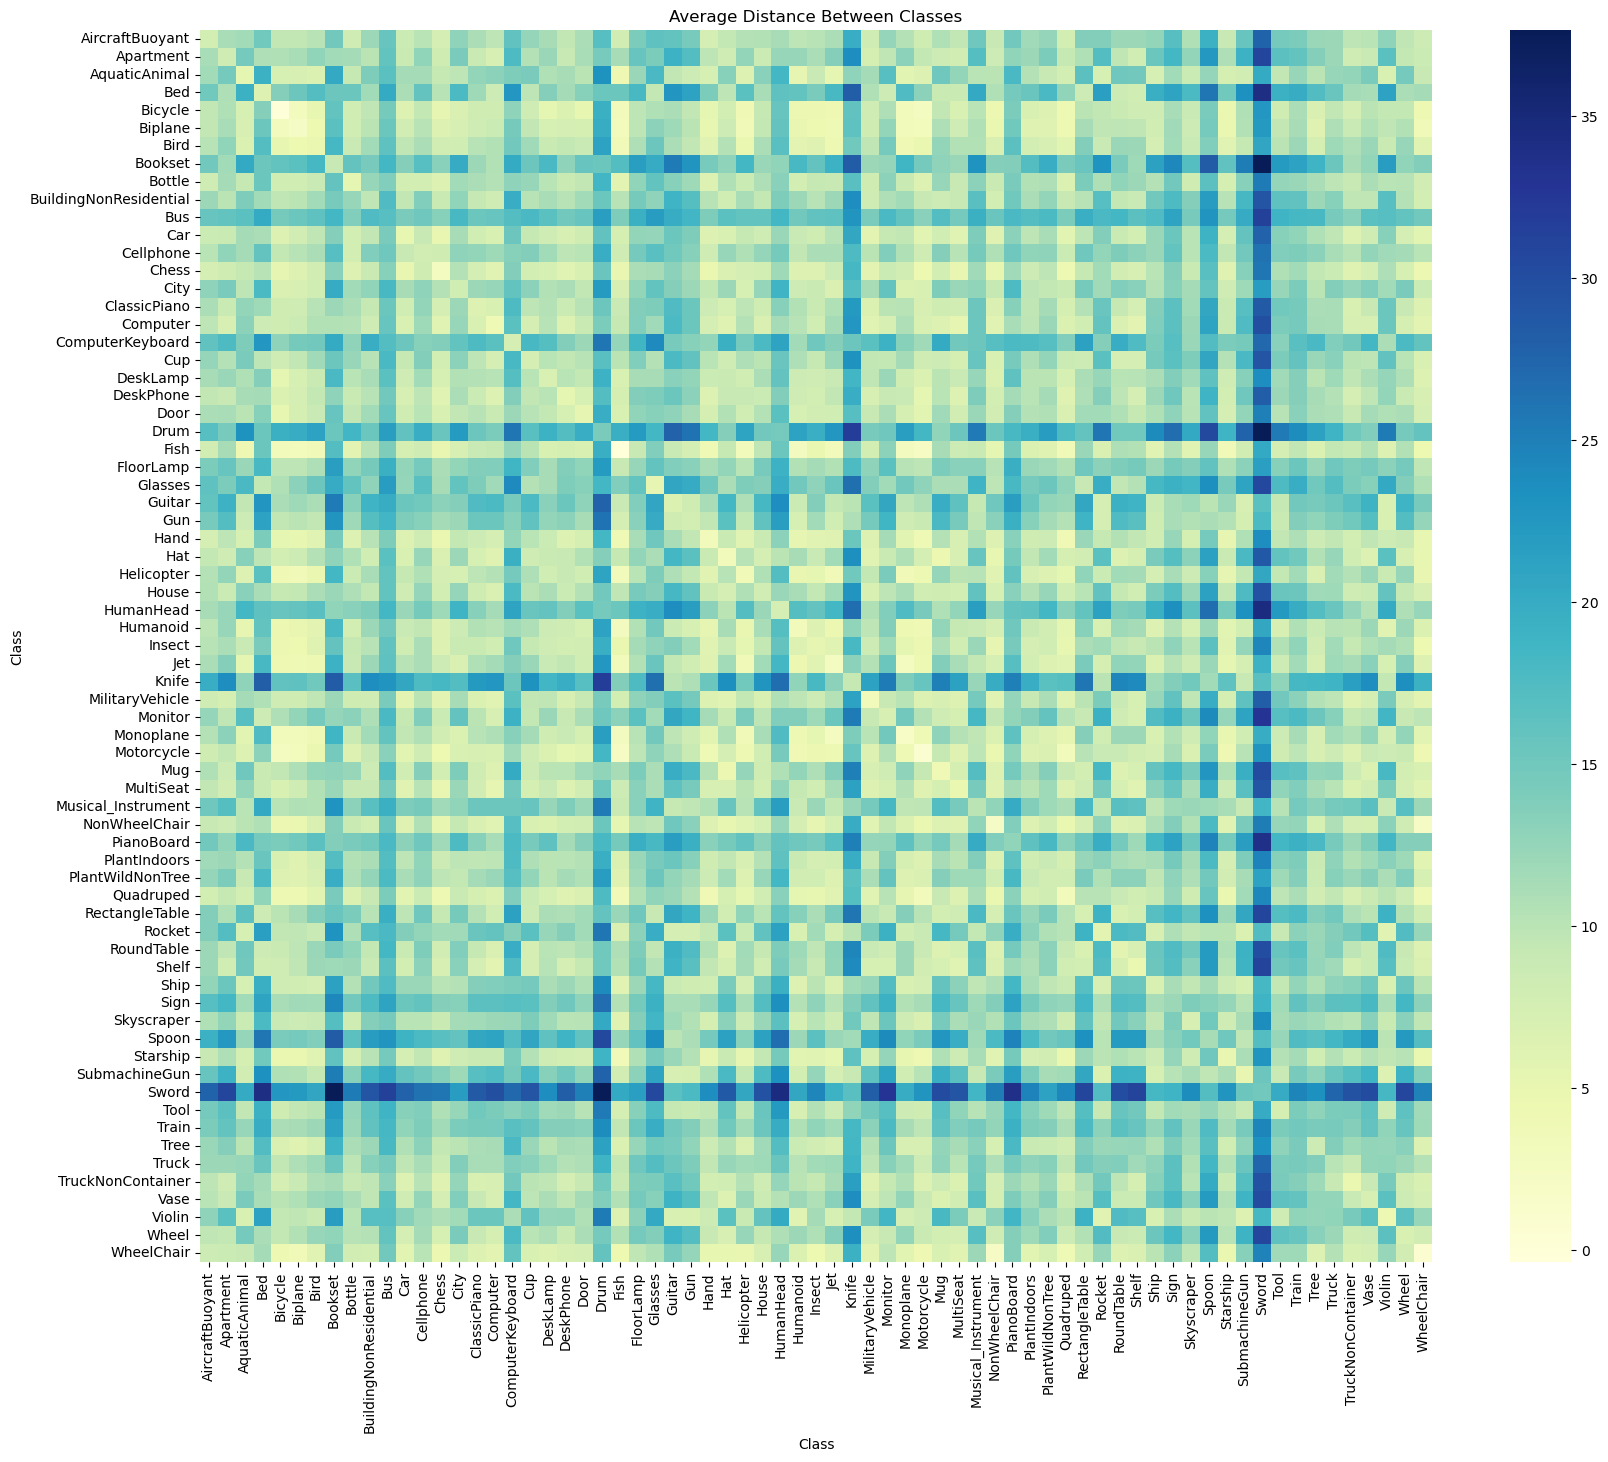

In [59]:

# Step 5: Plot the confusion matrix for average distances
plt.figure(figsize=(20, 16))
sns.heatmap(average_distances_custom, square=True,annot=False, cmap="YlGnBu", fmt=".2f",cbar_kws={'format': '%.0f'})
plt.title("Average Distance Between Classes")
plt.xlabel("Class")
plt.ylabel("Class")
plt.show()

['AquaticAnimal', 'Humanoid', 'Fish', 'Sword', 'Bus', 'Train', 'Car', 'Biplane', 'Insect']


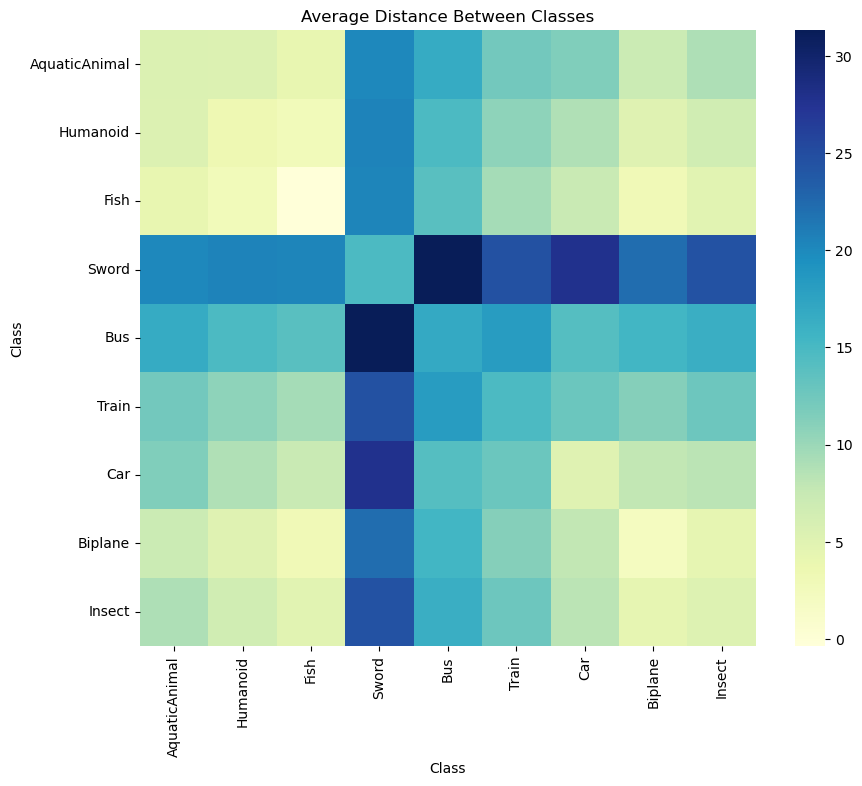

In [77]:
# Step 5: Plot the confusion matrix for average distances
plt.figure(figsize=(10, 8))

selected_classes = ["AquaticAnimal","Humanoid","Fish","Sword","Bus","Train","Car","Biplane","Insect"]  # replace with the actual class names you want to include

print(selected_classes)
# Step 2: Create a DataFrame to store the average distances between each selected class pair
subset_df = average_distances_custom.loc[selected_classes, selected_classes]
sns.heatmap(subset_df, square=True,annot=False, cmap="YlGnBu", fmt=".2f",cbar_kws={'format': '%.0f'})
plt.title("Average Distance Between Classes")
plt.xlabel("Class")
plt.ylabel("Class")
plt.show()